In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
from sklearn.preprocessing import *
# from sklearn 
import importlib.util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
# for error calculation MSE or MAE or Rsquare
from sklearn.metrics import *
# for spllititing the data_set
from sklearn.model_selection import train_test_split
# For support support vector regression
from sklearn.svm import SVR
# for time execution calculation
from datetime import datetime

In [78]:
# spec = importlib.util.spec_from_file_location("DataPreprocessing", "/home/admin1/PycharmProjects/Machine_learning_Python/Utility/DataPreprocessing.py")
#At home windows
spec = importlib.util.spec_from_file_location("DataPreprocessing", "C:/Users/PRAYAS/PycharmProjects/Machine_Learning_Python/Utility/DataPreprocessing.py")
# C:\Users\PRAYAS\PycharmProjects\Machine_Learning_Python\Utility
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
preprocess_obj = foo.DataPreprocessing()


Data PreProcessign object created successfully


In [79]:
dataframe = pd.read_csv('Data/Position_Salaries.csv')

In [80]:
dataframe

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [81]:
dataframe = dataframe[['Level','Salary']]

In [82]:
dataframe= dataframe.rename(columns={'Level':'x','Salary':'y'})

Inside Support vectore Regression
[[ 60000]
 [500000]] [ 87448.7742002  437130.30222969]


C:\Users\PRAYAS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\PRAYAS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\PRAYAS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\PRAYAS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\PRAYAS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 

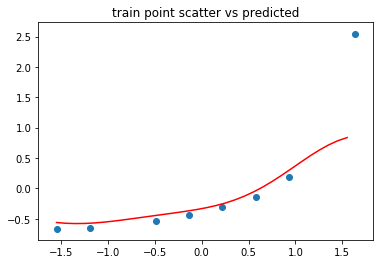

Accuracy by r2 score is = 92.30267749473835
Time Taken to solve this SVR in microseconds 634978


In [84]:
class Support_Vector_Regression:
    
    def __init__(self):
        print("Inside Support vectore Regression")
    
    def plotter(self,X,Y,lin_reg,plot_title):
        # smoothening the plot so that we can see a smooth curve so getting points with difference 0.1
        X_smooth = np.arange(X.min(),X.max(),0.1)
        plt.title(plot_title)
        plt.plot(X_smooth,lin_reg.predict(X_smooth.reshape(-1,1)),color='r')
        plt.scatter(X,Y)
        plt.show()
    
    def support_Vector_Regression_demo(self,dataframe):
        train_X = dataframe['x'].values.reshape(-1,1)
        train_Y = dataframe['y'].values.reshape(-1,1)
        train_X, test_X, train_Y, test_Y = train_test_split(train_X,train_Y,test_size=0.2,random_state=0)
        
        # Scaling
        S_x = StandardScaler()
        S_x.fit(train_X)
        S_y = StandardScaler().fit(train_Y)
        train_X = S_x.transform(train_X).reshape(-1,1)
        train_Y= S_y.transform(train_Y).reshape(-1,1)
        svr_obj = SVR(kernel='rbf') # by default its rbf only 
        svr_obj.fit(train_X,train_Y)
        Ypred = S_y.inverse_transform(svr_obj.predict(S_x.transform(test_X.reshape(-1,1))))
        print(test_Y,Ypred)
        
        # Plotttings
        self.plotter(train_X,train_Y,svr_obj,"train point scatter vs predicted")
#         self.plotter(test_X,test_Y,svr_obj,"Test vs predicted")

        # error calculations
        mse = mean_squared_error(Ypred,test_Y)
        mae = mean_absolute_error(Ypred,test_Y)
        r_score = r2_score(Ypred,test_Y)
        accuracy = r_score*100
        print("Accuracy by r2 score is = {}".format(accuracy))
    
    def main(self,dataframe):
        start = datetime.now()
        self.support_Vector_Regression_demo(dataframe)
        stop = datetime.now()
        print("Time Taken to solve this SVR in microseconds",(start-stop).microseconds)

if __name__=='__main__':
    try:
        svr_demo = Support_Vector_Regression()
        svr_demo.main(dataframe)
    except Exception as e:
        print("The process stopped because of ",e)